In [2]:
import pandas as pd
from pathlib import Path

In [25]:
from plotting_functions import sort_index

In [3]:
filename = Path("/Users/lliu2/Documents/Lab Call 5A - electrical panel constraints/FY23/Panels Estimation/euss1_2018_results_up00__panels5.csv")
df = pd.read_csv(filename, low_memory=False)

In [4]:
panel_cols = df.columns[-12:]
panel_cols

Index(['std_m_demand_load_fixed_VA', 'std_m_demand_load_special_VA',
       'std_m_nec_min_amp', 'std_m_nec_electrical_panel_amp',
       'opt_m_demand_load_general_VA', 'opt_m_demand_load_space_cond_VA',
       'opt_m_demand_load_continuous_VA', 'opt_m_nec_min_amp',
       'opt_m_nec_electrical_panel_amp', 'peak_amp', 'std_m_amp_pct_delta',
       'opt_m_amp_pct_delta'],
      dtype='object')

In [5]:
df[['std_m_demand_load_general_VA', 'std_m_demand_load_fixed_VA','std_m_demand_load_special_VA']].divide(
    df[['std_m_demand_load_general_VA', 'std_m_demand_load_fixed_VA','std_m_demand_load_special_VA']].sum(axis=1),
    axis=0
)

,std_m_demand_load_general_VA,std_m_demand_load_fixed_VA,std_m_demand_load_special_VA
0,0.163926,0.061395,0.774679
1,0.317520,0.121091,0.561390
2,0.122729,0.160881,0.716390
3,0.124348,0.163003,0.712649
4,0.226878,0.079943,0.693179
...,...,...,...
549995,0.229196,0.000000,0.770804
549996,0.240002,0.000000,0.759998
549997,0.157233,0.073044,0.769724
549998,0.197533,0.154705,0.647762


In [6]:
cond = df['std_m_nec_electrical_panel_amp']>=400

dfol = df.loc[cond]
dfol

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.applicable,...,std_m_nec_min_amp,std_m_nec_electrical_panel_amp,opt_m_demand_load_general_VA,opt_m_demand_load_space_cond_VA,opt_m_demand_load_continuous_VA,opt_m_nec_min_amp,opt_m_nec_electrical_panel_amp,peak_amp,std_m_amp_pct_delta,opt_m_amp_pct_delta
28,546376,92,2022-09-01 22:52:28,2022-09-01 22:53:35,Success,NaN,NaN,NaN,Non-CBSA Mountain,True,...,323.656222,400,17619.6,40805.068778,0.0,243.436120,300,66.180833,NaN,NaN
35,168379,209,2022-09-01 23:17:28,2022-09-01 23:17:55,Success,NaN,NaN,NaN,Non-CBSA East North Central,True,...,302.141527,400,20232.8,41908.213172,0.0,258.920888,300,46.827958,NaN,NaN
252,329508,590,2022-09-02 05:46:07,2022-09-02 05:47:03,Success,NaN,NaN,NaN,Non-CBSA East South Central,True,...,380.956284,400,30253.2,47453.238754,0.0,323.776828,400,293.546042,NaN,NaN
359,64615,120,2022-09-01 23:04:50,2022-09-01 23:05:26,Success,NaN,NaN,NaN,Non-CBSA South Atlantic,True,...,325.634010,400,19419.6,37525.896926,0.0,237.272904,300,57.367458,NaN,NaN
425,34616,210,2022-09-01 23:17:22,2022-09-01 23:18:17,Success,NaN,NaN,NaN,Non-CBSA East South Central,True,...,300.418236,400,25336.8,40924.439838,0.0,276.088499,300,184.471000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549776,155019,25,2022-09-02 02:43:57,2022-09-02 02:44:28,Success,NaN,NaN,NaN,"CBSA Miami-Fort Lauderdale-West Palm Beach, FL",True,...,316.688657,400,18998.0,40542.502132,0.0,248.085426,300,74.003833,NaN,NaN
549832,280473,321,2022-09-02 03:40:22,2022-09-02 03:40:58,Success,NaN,NaN,NaN,Non-CBSA South Atlantic,True,...,421.578928,600,18699.6,57057.616298,0.0,315.655068,400,51.569167,NaN,NaN
549843,397123,292,2022-09-02 03:41:41,2022-09-02 03:42:11,Success,NaN,NaN,NaN,Non-CBSA East South Central,True,...,391.502540,400,25336.8,55207.898437,0.0,335.602910,400,266.249250,NaN,NaN
549858,111018,320,2022-09-02 03:39:38,2022-09-02 03:40:21,Success,NaN,NaN,NaN,Non-CBSA Mountain,True,...,376.304897,400,26056.8,45773.820172,0.0,299.294251,300,110.916375,NaN,NaN


In [38]:
cond = (df["completed_status"] == "Success") & (df["build_existing_model.geometry_building_type_recs"]=="Single-Family Detached")
df.loc[cond]

In [17]:
# filename2 = Path("/Users/lliu2/Documents/Lab Call 5A - electrical panel constraints/FY23/Panels Estimation/euss1_2018_results_up00__panels5_400plus.csv")
# dfol.to_csv(filename2, index=False)

In [11]:
std_m_loads = dfol[['std_m_demand_load_general_VA', 'std_m_demand_load_fixed_VA','std_m_demand_load_special_VA']].divide(
    dfol[['std_m_demand_load_general_VA', 'std_m_demand_load_fixed_VA','std_m_demand_load_special_VA']].sum(axis=1),
    axis=0
)
std_m_loads

,std_m_demand_load_general_VA,std_m_demand_load_fixed_VA,std_m_demand_load_special_VA
28,0.089163,0.023173,0.887664
35,0.167260,0.000000,0.832740
252,0.179707,0.049218,0.771074
359,0.088621,0.080612,0.830767
425,0.176608,0.062413,0.760979
...,...,...,...
549776,0.083167,0.069022,0.847811
549832,0.068452,0.044476,0.887072
549843,0.129083,0.047892,0.823025
549858,0.144341,0.069757,0.785902


<Axes: >

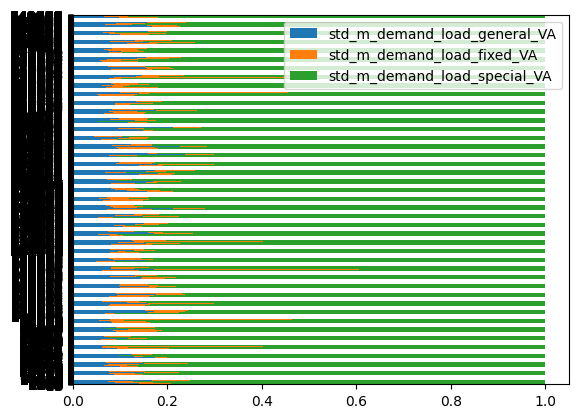

In [16]:
std_m_loads.plot(kind="barh", stacked=True, yticks=[])

In [7]:
dfol[panel_cols]

,std_m_demand_load_fixed_VA,std_m_demand_load_special_VA,std_m_nec_min_amp,std_m_nec_electrical_panel_amp,opt_m_demand_load_general_VA,opt_m_demand_load_space_cond_VA,opt_m_demand_load_continuous_VA,opt_m_nec_min_amp,opt_m_nec_electrical_panel_amp,peak_amp,std_m_amp_pct_delta,opt_m_amp_pct_delta
28,1800.0,68951.543191,323.656222,400,17619.6,40805.068778,0.0,243.436120,300,66.180833,NaN,NaN
35,0.0,60385.266465,302.141527,400,20232.8,41908.213172,0.0,258.920888,300,46.827958,NaN,NaN
252,4500.0,70498.958275,380.956284,400,30253.2,47453.238754,0.0,323.776828,400,293.546042,NaN,NaN
359,6300.0,64926.212475,325.634010,400,19419.6,37525.896926,0.0,237.272904,300,57.367458,NaN,NaN
425,4500.0,54866.876560,300.418236,400,25336.8,40924.439838,0.0,276.088499,300,184.471000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
549776,5246.0,64438.127665,316.688657,400,18998.0,40542.502132,0.0,248.085426,300,74.003833,NaN,NaN
549832,4500.0,89752.992837,421.578928,600,18699.6,57057.616298,0.0,315.655068,400,51.569167,NaN,NaN
549843,4500.0,77331.909541,391.502540,400,25336.8,55207.898437,0.0,335.602910,400,266.249250,NaN,NaN
549858,6300.0,70977.275215,376.304897,400,26056.8,45773.820172,0.0,299.294251,300,110.916375,NaN,NaN


In [9]:
[col for col in df.columns if "floor_area" in col]

['build_existing_model.geometry_floor_area',
 'build_existing_model.geometry_floor_area_bin',
 'upgrade_costs.floor_area_attic_ft_2',
 'upgrade_costs.floor_area_attic_insulation_increase_ft_2_delta_r_value',
 'upgrade_costs.floor_area_conditioned_ft_2',
 'upgrade_costs.floor_area_conditioned_infiltration_reduction_ft_2_delta_ach_50',
 'upgrade_costs.floor_area_foundation_ft_2',
 'upgrade_costs.floor_area_lighting_ft_2']

In [26]:
sort_index(
    dfol.groupby([
    "std_m_nec_electrical_panel_amp", 
    "build_existing_model.infiltration", # "hvac_heating_efficiency", "hvac_cooling_efficiency", "insulation_wall"
    ])["building_id"].count().unstack()
)

build_existing_model.infiltration,1 ACH50,10 ACH50,15 ACH50,2 ACH50,20 ACH50,25 ACH50,3 ACH50,30 ACH50,4 ACH50,40 ACH50,5 ACH50,50 ACH50,6 ACH50,7 ACH50,8 ACH50
std_m_nec_electrical_panel_amp,,,,,,,,,,,,,,,
400,34.0,525.0,1244.0,373.0,933.0,678.0,597.0,434.0,546.0,564.0,405.0,359.0,328.0,330.0,274.0
600,4.0,125.0,194.0,103.0,169.0,118.0,198.0,83.0,170.0,136.0,156.0,72.0,133.0,102.0,65.0
700,NaN,11.0,14.0,6.0,5.0,4.0,10.0,1.0,5.0,1.0,19.0,4.0,11.0,8.0,13.0
800,NaN,5.0,13.0,2.0,2.0,5.0,NaN,2.0,4.0,NaN,1.0,NaN,2.0,4.0,4.0
900,NaN,2.0,1.0,2.0,2.0,NaN,2.0,1.0,3.0,NaN,6.0,NaN,NaN,1.0,1.0
1000,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,3.0,NaN,1.0,3.0,1.0
1100,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
1200,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0
1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [27]:
sort_index(
    dfol.groupby([
    "std_m_nec_electrical_panel_amp", 
    "build_existing_model.insulation_wall"
    ])["building_id"].count().unstack()
)

build_existing_model.insulation_wall,"Brick, 12-in, 3-wythe, R-11","Brick, 12-in, 3-wythe, R-15","Brick, 12-in, 3-wythe, R-19","Brick, 12-in, 3-wythe, R-7","Brick, 12-in, 3-wythe, Uninsulated","CMU, 6-in Hollow, R-11","CMU, 6-in Hollow, R-15","CMU, 6-in Hollow, R-19","CMU, 6-in Hollow, R-7","CMU, 6-in Hollow, Uninsulated","Wood Stud, R-11","Wood Stud, R-15","Wood Stud, R-19","Wood Stud, R-7","Wood Stud, Uninsulated"
std_m_nec_electrical_panel_amp,,,,,,,,,,,,,,,
400,533.0,103.0,114.0,167.0,654.0,106.0,25.0,24.0,37.0,228.0,1778.0,325.0,453.0,457.0,2620.0
600,91.0,17.0,17.0,53.0,182.0,23.0,3.0,4.0,11.0,43.0,445.0,62.0,83.0,120.0,674.0
700,1.0,1.0,NaN,4.0,15.0,2.0,NaN,1.0,NaN,3.0,17.0,2.0,1.0,6.0,59.0
800,NaN,NaN,NaN,2.0,7.0,NaN,NaN,NaN,1.0,2.0,3.0,1.0,1.0,1.0,26.0
900,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,12.0
1000,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,8.0
1100,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1200,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [28]:
sort_index(
    dfol.groupby([
    "std_m_nec_electrical_panel_amp", 
    "build_existing_model.hvac_heating_efficiency"
    ])["building_id"].count().unstack()
)

build_existing_model.hvac_heating_efficiency,"ASHP, SEER 10, 6.2 HSPF","ASHP, SEER 13, 7.7 HSPF","ASHP, SEER 15, 8.5 HSPF","Electric Baseboard, 100% Efficiency","Electric Boiler, 100% AFUE","Electric Furnace, 100% AFUE","Electric Wall Furnace, 100% AFUE","Fuel Boiler, 76% AFUE","Fuel Boiler, 80% AFUE","Fuel Boiler, 90% AFUE","Fuel Furnace, 60% AFUE","Fuel Furnace, 76% AFUE","Fuel Furnace, 80% AFUE","Fuel Furnace, 92.5% AFUE","Fuel Wall/Floor Furnace, 60% AFUE","Fuel Wall/Floor Furnace, 68% AFUE",None,Other,Shared Heating
std_m_nec_electrical_panel_amp,,,,,,,,,,,,,,,,,,,
400,341.0,3222.0,832.0,260.0,3.0,1771.0,4.0,4.0,59.0,2.0,7.0,71.0,634.0,298.0,20.0,31.0,3.0,39.0,23.0
600,77.0,986.0,243.0,27.0,1.0,342.0,NaN,NaN,8.0,NaN,2.0,11.0,77.0,37.0,3.0,10.0,1.0,2.0,1.0
700,7.0,69.0,9.0,NaN,NaN,13.0,NaN,NaN,2.0,NaN,NaN,1.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
800,3.0,21.0,8.0,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,1.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN
900,NaN,12.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1000,1.0,2.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN
1100,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
sort_index(
    dfol.groupby([
    "std_m_nec_electrical_panel_amp", 
    "build_existing_model.hvac_cooling_efficiency"
    ])["building_id"].count().unstack()
)

build_existing_model.hvac_cooling_efficiency,"AC, SEER 10","AC, SEER 13","AC, SEER 15","AC, SEER 8",Heat Pump,None,"Room AC, EER 10.7","Room AC, EER 12.0","Room AC, EER 8.5","Room AC, EER 9.8",Shared Cooling
std_m_nec_electrical_panel_amp,,,,,,,,,,,
400,662.0,1537.0,683.0,92.0,4396.0,104.0,73.0,26.0,14.0,34.0,3.0
600,108.0,267.0,95.0,15.0,1306.0,16.0,11.0,2.0,1.0,7.0,NaN
700,11.0,13.0,2.0,1.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN
800,3.0,6.0,1.0,2.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
900,2.0,2.0,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1000,1.0,5.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1100,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1200,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1300,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
sort_index(
    dfol.groupby([
    "std_m_nec_electrical_panel_amp", 
    "build_existing_model.water_heater_efficiency"
    ])["building_id"].count().unstack()
)

build_existing_model.water_heater_efficiency,"Electric Heat Pump, 80 gal",Electric Premium,Electric Standard,Electric Tankless,FIXME Fuel Oil Indirect,Fuel Oil Premium,Fuel Oil Standard,Natural Gas Premium,Natural Gas Standard,Natural Gas Tankless,Other Fuel,Propane Premium,Propane Standard,Propane Tankless
std_m_nec_electrical_panel_amp,,,,,,,,,,,,,,
400,43.0,572.0,5000.0,483.0,4.0,3.0,10.0,117.0,1175.0,29.0,24.0,15.0,133.0,16.0
600,12.0,145.0,1288.0,89.0,1.0,1.0,NaN,22.0,234.0,2.0,1.0,4.0,27.0,2.0
700,1.0,10.0,70.0,3.0,NaN,NaN,NaN,5.0,20.0,2.0,NaN,1.0,NaN,NaN
800,NaN,3.0,26.0,3.0,NaN,NaN,NaN,1.0,9.0,NaN,NaN,1.0,1.0,NaN
900,NaN,2.0,14.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
1000,NaN,1.0,6.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
1100,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1200,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [36]:
sort_index(
    dfol.groupby([
    "std_m_nec_electrical_panel_amp", 
    "build_existing_model.geometry_floor_area",
    "build_existing_model.insulation_wall" # infiltration
    ])["building_id"].count().unstack()
)

build_existing_model.insulation_wall                                     Brick, 12-in, 3-wythe, R-11  \
std_m_nec_electrical_panel_amp build_existing_model.geometry_floor_area                                
400                            1000-1499                                                         6.0   
                               1500-1999                                                        17.0   
                               2000-2499                                                        34.0   
                               2500-2999                                                        59.0   
                               3000-3999                                                       115.0   
                               4000+                                                           302.0   
                               500-749                                                           NaN   
                               750-999                                                           NaN   
600                            1000-1499                                                         NaN   
                               1500-1999                                                         NaN   
                               2000-2499                                                         1.0   
                               2500-2999                                                         3.0   
                               3000-3999                                                         7.0   
                               4000+                                                            80.0   
700                            2000-2499                                                         NaN   
                               2500-2999                                                         NaN   
                               3000-3999                                                         NaN   
                               4000+                                                             1.0   
800                            2000-2499                                                         NaN   
                               2500-2999                                                         NaN   
                               3000-3999                                                         NaN   
                               4000+                                                             NaN   
900                            2500-2999                                                         NaN   
                               3000-3999                                                         NaN   
                               4000+                                                             1.0   
1000                           4000+                                                             NaN   
1100                           4000+                                                             NaN   
1200                           4000+                                                             1.0   
1300                           4000+                                                             NaN   
1400                           4000+                                                             NaN   

build_existing_model.insulation_wall                                     Brick, 12-in, 3-wythe, R-15  \
std_m_nec_electrical_panel_amp build_existing_model.geometry_floor_area                                
400                            1000-1499                                                         NaN   
                               1500-1999                                                         3.0   
                               2000-2499                                                         4.0   
                               2500-2999                                                         8.0   
                               3000-3999       

In [11]:
dfol.groupby(["std_m_nec_electrical_panel_amp"])["upgrade_costs.floor_area_conditioned_ft_2"].min()

std_m_nec_electrical_panel_amp
400      633.0
600     1202.0
700     2176.0
800     2176.0
900     2663.0
1000    8194.0
1100    8194.0
1200    8194.0
1300    8194.0
1400    8194.0
Name: upgrade_costs.floor_area_conditioned_ft_2, dtype: float64

In [12]:
dfol.loc[dfol["upgrade_costs.floor_area_conditioned_ft_2"]==633]

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.applicable,...,std_m_nec_min_amp,std_m_nec_electrical_panel_amp,opt_m_demand_load_general_VA,opt_m_demand_load_space_cond_VA,opt_m_demand_load_continuous_VA,opt_m_nec_min_amp,opt_m_nec_electrical_panel_amp,peak_amp,std_m_amp_pct_delta,opt_m_amp_pct_delta
222617,53001,445,2022-09-02 01:13:45,2022-09-02 01:14:23,Success,NaN,NaN,NaN,Non-CBSA South Atlantic,True,...,319.446542,400,18783.6,35868.140596,0.0,227.715586,300,83.193833,NaN,NaN
